In [ ]:
import cv2 as cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
from  PIL import Image
from matplotlib import pyplot as plt

## **BOX FILTER**

In [ ]:
img=cv2.imread("/content/cameraman.bmp",0)

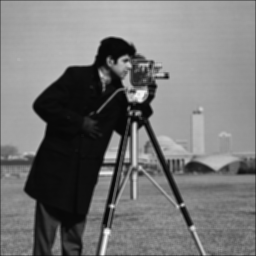

In [ ]:
kernel = np.ones((3,3),np.float32)/9.0 ;
filter_img=np.ones_like(img);
padded_img = np.pad(img, ((1, 1), (1, 1)), mode='constant')
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    filter_img[i,j]=np.sum(kernel*padded_img[i:i+3,j:j+3]);

output_img = np.uint8(filter_img)
cv2_imshow(output_img)


## **WEIGHTED FILTER**

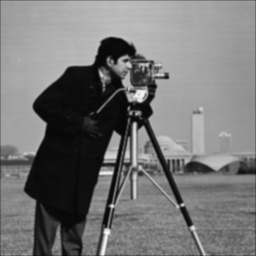

In [ ]:
kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16.0
filter_img=np.ones_like(img);
padded_img = np.pad(img, ((1, 1), (1, 1)), mode='constant')
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    weighted_sum=0.0;
    kernel_sum=0.0;
    for k in range(-1,2):
      for l in range(-1,2):
        pixel_val=padded_img[i+k+1,j+l+1]
        weight=kernel[k+1,l+1]
        weighted_sum+=pixel_val*weight;
        kernel_sum+=weight
        filter_img[i,j]=weighted_sum/kernel_sum;

output_img = np.uint8(filter_img)
cv2_imshow(output_img)

## **MEDIAN FILTER**

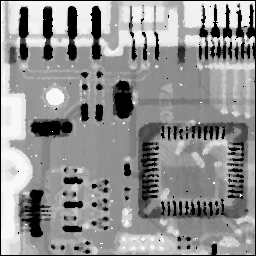

In [ ]:

img = cv2.imread('/content/median.bmp', 0)

k_size = 3
p_size = k_size // 2
output = np.zeros_like(img)
#filtered_img = cv2.medianBlur(img, kernel_size)
for i in range(p_size, img.shape[0] - p_size):
    for j in range(p_size, img.shape[1] - p_size):
        window = img[i - p_size:i + p_size + 1, j - p_size:j + p_size + 1]
        median = np.median(window)
        output[i, j] = median

cv2_imshow(output)
